# An Analysis of Sleep Disorders and Some Patient Information

# Introduction

In this project, I will be analysing the participants' information from the DREAMT dataset in order to uncover relationships between sleep disorders like sleep apnea, snoring, difficulty breathing and participant characteristics like age, gender, BMI, Arousal Index, mean_SaO2, medical history, Obstructive apnea-hypopnea index (OAHI) and Apnea-Hypopnea Index (AHI), using the DREAMT dataset.

The outcome will be a comprehensive data analytics report with visualizations, insights and conclusion.


# Data

The data being used for this analysis comes from DREAMT: Dataset for Real-time sleep stage EstimAtion using Multisensor wearable Technology 1.0.1.

This is a curated dataset collected from 100 patients using Empatica E4. The original purpose of the study was to match high resolution physiological signals to sleep stage information and sleep apnea events extracted from Polysomnography.

However, in the current project, I am only using the participants' information section to create an analysis on the factors affecting the likelihood of Obstructive Sleep Apnea as potrayed by the participants who were recruited for the DREAMT study.


- columns:

  - "SID": id number of each participant
  - "Age": Age of the participant
  - "GEDNER": Gender of the participant
  - "BMI": Body Mass Index of the participant
  - "OAHI": Obstructive apnea-hypopnea index of the participant
  - "AHI": Apnea-hypopnea index of the participant
  - "Mean_SaO2": Mean_SaO2 of the participant
  - "Arousal Index": Arousal index of the participant
  - "MEDICAL_HISTORY": Medical history of the participant
       - "GERD": "Gastroesophageal reflux disease"
       - "CAD": "Coronary artery disease"(full form) 
       - Notes: Only the most commonly occurring comorbidities in the cohort is recorded
  - "Sleep_Disorders": Sleep disorder noticed of the participant
       - "OSA": "Obstructive sleep apnea"  
       - "H/O OSA": "History of obstructive sleep apnea"
       - "RLS": "Restless legs syndrome"
       - "EDS": "Excessive daytime sleepiness"
       - "RBD": "REM sleep behavior disorder"
       - "MCI": "Mild cognitive impairment"
       - Notes: Only the most commonly occurring comorbidities in the cohort is recorded



Reference: Wang, K., Yang, J., Shetty, A., & Dunn, J. (2024). DREAMT: Dataset for Real-time sleep stage EstimAtion using Multisensor wearable Technology (version 1.0.1). PhysioNet. https://doi.org/10.13026/nktq-0858.



In [1]:
# Importing the libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data

df = pd.read_csv(r"\physionet.org\files\dreamt\1.0.1\participant_info.csv")
df.head()

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY,Sleep_Disorders
0,S002,65.90,M,27.0,19,19,91%,98,"Asthma, Body Pain, GERD, Hypertension, Sleep A...",OSA
1,S003,29.38,F,51.0,34,37,95%,28,None,"snoring, sleep apnea, difficulty breathing, sn..."
2,S004,55.66,F,41.0,63,99,89%,109,"Arrhythmia, Body Pain, Depression, Dyspnea, GERD",difficulty breathing
3,S005,49.12,F,43.0,19,20,95%,28,"Asthma, Body Pain, Depression, Diabetes, Dyspn...",OSA
4,S006,36.91,F,22.0,4,5,97%,34,"Depression, Sleep Apnea",OSA


In [3]:
df.shape

(100, 10)

<br> <br>

# Data Cleaning and Preprocessing

Looking at the data, you can see that some columns have groups of data that need to be broken down. You may want to expand the columns, Medical history and sleep disorders into multiple columns of specific medical histories and sleep disorders in order to have enough information for a more meaningful analysis. <br>
Here are the main actions that will be performed while cleaning and transforming this data:
- Clean the strings in the Medical History and Sleep Disorders columns
- Create a new column for each item in the columns, Medical History and Sleep Disorders
- Drop all redundant columns
- Convert Gender column to binary values
<br> <br>

In [4]:
# Inspecting the column, Sleep Disorders
df['Sleep_Disorders'].unique()

array(['OSA', 'snoring, sleep apnea, difficulty breathing, snorts',
       'difficulty breathing',
       'difficulty staying asleep, snoring, difficulty breathing',
       'H/O OSA', 'snoring, snort, RLS', 'Chronic fatigue', 'EDS, RBD',
       'sleep apnea', 'EDS, snoring', 'OSA, EDS, snoring', 'hypersomnia',
       'OSA, snoring, difficulty breathing, snort, RLS, grind teeth',
       'snoring, sleep apnea',
       'difficulty breathing, snoring, sleep apnea, RLS, EDS',
       'snoring, snort', 'Insomnia', 'MCI and Sleep apnea',
       'EDS, fatigue, snoring',
       'snoring, difficulty breathing, snort, morning headaches, grind teeth, Sleep Apnea',
       'Snoring', 'snoring, sleep apnea, morning headaches, RLS',
       'morning headaches, bruxism, EDS', 'OSA, sleep apnea',
       'sleep apnea, difficulty breathing, bruxism, EDS, RLS',
       'snoring, EDS, difficulty breathing, morning headaches, RLS, grind teeth',
       'EDS, morning headaches, snoring, sleep apnea, snort', 'None

You can observe that some sleep disorders are duplicated with different spellings, for example, 'snort' and 'snorts', 'difficulty breathing' and 'diffifulty breathing', 'sleep apnea' and 'Sleep apnea', 'OSA snoring' and 'OSA, snoring', 'Snoring' and 'snoring' and 'Snore'. 
Others appear together without any comas separating them. For example: 'OSA snoring', 'MCI and sleep apnea'. We'll correct these strings with the code below.

In [5]:
# Cleaning the strings in the Sleep_Disorders column
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('diffifulty breathing','difficulty breathing') 
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('snorts','snort') 
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('Sleep apnea','sleep apnea')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('Sleep Apnea','sleep apnea')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('Snoring','snoring')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('snore','snoring')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('grind teeth','grinds teeth')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('None','none')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('OSA snoring','OSA, snoring')
df['Sleep_Disorders'] = df['Sleep_Disorders'].str.replace('MCI and sleep apnea','MCI, sleep apnea')


In [6]:
df['Sleep_Disorders'].unique()

array(['OSA', 'snoring, sleep apnea, difficulty breathing, snort',
       'difficulty breathing',
       'difficulty staying asleep, snoring, difficulty breathing',
       'H/O OSA', 'snoring, snort, RLS', 'Chronic fatigue', 'EDS, RBD',
       'sleep apnea', 'EDS, snoring', 'OSA, EDS, snoring', 'hypersomnia',
       'OSA, snoring, difficulty breathing, snort, RLS, grinds teeth',
       'snoring, sleep apnea',
       'difficulty breathing, snoring, sleep apnea, RLS, EDS',
       'snoring, snort', 'Insomnia', 'MCI, sleep apnea',
       'EDS, fatigue, snoring',
       'snoring, difficulty breathing, snort, morning headaches, grinds teeth, sleep apnea',
       'snoring', 'snoring, sleep apnea, morning headaches, RLS',
       'morning headaches, bruxism, EDS', 'OSA, sleep apnea',
       'sleep apnea, difficulty breathing, bruxism, EDS, RLS',
       'snoring, EDS, difficulty breathing, morning headaches, RLS, grinds teeth',
       'EDS, morning headaches, snoring, sleep apnea, snort', 'none'

In [7]:
# Getting unique sleep disorders to be used as column names for the new columns to be derived from 'Sleep_Disorders' column

# Getting unique groups of sleep disorders from the data
a = sorted(df['Sleep_Disorders'].unique())

# Merging the groups to one comma-separated string of values
b = ','.join(a)

# Getting a list of unique strings for each sleep disorder
c = list(set(b.split(",")))

# Removing leading whitespaces from the strings in the list
unique_sleep_disorders = []
for i in c:
    j = i.lstrip()   #or i.replace(' ', '')
    unique_sleep_disorders.append(j)
    
unique_sleep_disorders = list(set(unique_sleep_disorders))
print(unique_sleep_disorders) 


['EDS', 'RLS', 'fatigue', 'RBD', 'headache', 'hypersomnia', 'snort', 'MCI', 'grinds teeth', 'Chronic fatigue', 'difficulty breathing', 'H/O OSA', 'morning headaches', 'none', 'bruxism', 'Insomnia', 'snoring', 'difficulty staying asleep', 'OSA', 'sleep apnea']


In [8]:
# Inspecting the column, 'MEDICAL_HISTORY']
sorted(df['MEDICAL_HISTORY'].unique())

['Anxiety',
 'Anxiety, Arrhythmia',
 'Anxiety, Arrhythmia, Asthma, Body Pain, CAD, Depression, Diabetes, GERD, Hypertension, Sleep Apnea',
 'Anxiety, Arrhythmia, Asthma, Depression, Diabetes, Dyspnea, GERD, Hypertension, Sleep Apnea',
 'Anxiety, Arrhythmia, Body Pain',
 'Anxiety, Asthma, Body Pain, CAD, Depression, Diabetes, GERD, Hypertension, Migraine',
 'Anxiety, Asthma, Body Pain, Depression',
 'Anxiety, Asthma, Body Pain, Depression, Dyspnea',
 'Anxiety, Asthma, Body Pain, Depression, Migraine',
 'Anxiety, Asthma, Depression',
 'Anxiety, Asthma, Depression, Diabetes, Hypertension, Sleep Apnea',
 'Anxiety, Asthma, Depression, Hypertension, Migraine',
 'Anxiety, Body Pain',
 'Anxiety, Body Pain, CAD, Diabetes, GERD, Hypertension',
 'Anxiety, Body Pain, Depression',
 'Anxiety, Body Pain, Depression, GERD',
 'Anxiety, Body Pain, Depression, Sleep Apnea',
 'Anxiety, Body Pain, GERD, Hypertension',
 'Anxiety, Body Pain, Hypertension',
 'Anxiety, Depression, Dyspnea, Sleep Apnea',
 'Anxi

In [9]:
# Getting unique medical histories to be used as column names for the new columns to be derived from 'MEDICAL_HISTORY' column

# Getting unique groups of medical history values from the data
d = sorted(df['MEDICAL_HISTORY'].unique())

# Merging the groups to one comma-separated string of values
e = ','.join(d)

# Getting a list of unique strings for each medical history
f = list(set(e.split(",")))

# Removing leading whitespaces from the strings in the list
unique_medical_history = []
for i in f:
    j = i.lstrip()
    unique_medical_history.append(j)
    
unique_medical_history = list(set(unique_medical_history))
print(unique_medical_history) 


['Diabetes', 'Dyspnea', 'None', 'Asthma', 'Migraine', 'Anxiety', 'CAD', 'Body Pain', 'Sleep Apnea', 'Arrhythmia', 'Depression', 'Hypertension', 'GERD']


In [10]:
# Breaking the 'MEDICAL_HISTORY' column into multiple columns under each column name in the unique_medical_history list

for string in unique_medical_history:  
    column_name = 'MH_' + string       # Add prefix 'MH' for Medical History
    df[column_name] = np.where(df['MEDICAL_HISTORY'].str.contains(string, case=False, na=False), 1, 0)        
    
print(df)    

     SID    AGE GENDER   BMI  OAHI  AHI Mean_SaO2  Arousal Index  \
0   S002  65.90      M  27.0    19   19       91%             98   
1   S003  29.38      F  51.0    34   37       95%             28   
2   S004  55.66      F  41.0    63   99       89%            109   
3   S005  49.12      F  43.0    19   20       95%             28   
4   S006  36.91      F  22.0     4    5       97%             34   
..   ...    ...    ...   ...   ...  ...       ...            ...   
95  S099  59.92      M  26.0    31   31       94%             68   
96  S100  59.89      F  28.0    25   25       95%             20   
97  S101  38.02      F  39.0     1    2       99%             20   
98  S102  57.44      M  26.0    18   24       95%             43   
99  S103  64.07      F  32.0    36   37       93%             49   

                                      MEDICAL_HISTORY  \
0   Asthma, Body Pain, GERD, Hypertension, Sleep A...   
1                                                None   
2    Arrhyth

In [11]:
# Breaking the 'Sleep_Disorders' column into multiple columns under each column name in the unique_sleep_disorders list

for string in unique_sleep_disorders:
    column_name = 'SD_' + string       #Add prefix 'SD' for Sleep Disorder
    df[column_name] = np.where(df['Sleep_Disorders'].str.contains(string, case=False, na=False), 1, 0)     
    
print(df)    


     SID    AGE GENDER   BMI  OAHI  AHI Mean_SaO2  Arousal Index  \
0   S002  65.90      M  27.0    19   19       91%             98   
1   S003  29.38      F  51.0    34   37       95%             28   
2   S004  55.66      F  41.0    63   99       89%            109   
3   S005  49.12      F  43.0    19   20       95%             28   
4   S006  36.91      F  22.0     4    5       97%             34   
..   ...    ...    ...   ...   ...  ...       ...            ...   
95  S099  59.92      M  26.0    31   31       94%             68   
96  S100  59.89      F  28.0    25   25       95%             20   
97  S101  38.02      F  39.0     1    2       99%             20   
98  S102  57.44      M  26.0    18   24       95%             43   
99  S103  64.07      F  32.0    36   37       93%             49   

                                      MEDICAL_HISTORY  \
0   Asthma, Body Pain, GERD, Hypertension, Sleep A...   
1                                                None   
2    Arrhyth

In [12]:
df.columns

Index(['SID', 'AGE', 'GENDER', 'BMI', 'OAHI', 'AHI', 'Mean_SaO2',
       'Arousal Index', 'MEDICAL_HISTORY', 'Sleep_Disorders', 'MH_Diabetes',
       'MH_Dyspnea', 'MH_None', 'MH_Asthma', 'MH_Migraine', 'MH_Anxiety',
       'MH_CAD', 'MH_Body Pain', 'MH_Sleep Apnea', 'MH_Arrhythmia',
       'MH_Depression', 'MH_Hypertension', 'MH_GERD', 'SD_EDS', 'SD_RLS',
       'SD_fatigue', 'SD_RBD', 'SD_headache', 'SD_hypersomnia', 'SD_snort',
       'SD_MCI', 'SD_grinds teeth', 'SD_Chronic fatigue',
       'SD_difficulty breathing', 'SD_H/O OSA', 'SD_morning headaches',
       'SD_none', 'SD_bruxism', 'SD_Insomnia', 'SD_snoring',
       'SD_difficulty staying asleep', 'SD_OSA', 'SD_sleep apnea'],
      dtype='object')

To avoid duplication, we'll drop the original 'MEDICAL_HISTORY' and 'Sleep_Disorders' columns. <br> <br>
You'll notice that in the participants' data collected, for some participants, their sleep disoder, sleep apnea was recorded in the 'Sleep_Disorders' column as well as in the 'MEDICAL_HISTORY' column. To solve this we have to drop the new 'MH_Sleep Apnea' column, since it is a duplicate of 'SD_sleep apnea' column. <br> <br>
For the purpose of this analysis, we can further simplify 3 similar columns by merging them: History of OSA (H/O OSA), OSA and sleep apnea. This happened because for some participants, their sleep apnea condition is not specified - whether Central Sleep Apnea (CSA) or Obstructive Sleep Apnea (OSA)-, while others just have a history of OSA which is being managed somehow. So let us merge these into one value in a new column called 'SD_Sleep Apnea'.

In [13]:
# Dropping 'MEDICAL_HISTORY', 'Sleep_Disorders' and 'MH_Sleep Apnea' columns
pd.set_option('display.max_columns', 14)
df_new = df.drop(['MEDICAL_HISTORY', 'Sleep_Disorders', 'MH_Sleep Apnea'], axis=1)

df_new.head()

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,...,SD_none,SD_bruxism,SD_Insomnia,SD_snoring,SD_difficulty staying asleep,SD_OSA,SD_sleep apnea
0,S002,65.90,M,27.0,19,19,91%,...,0,0,0,0,0,1,0
1,S003,29.38,F,51.0,34,37,95%,...,0,0,0,1,0,0,1
2,S004,55.66,F,41.0,63,99,89%,...,0,0,0,0,0,0,0
3,S005,49.12,F,43.0,19,20,95%,...,0,0,0,0,0,1,0
4,S006,36.91,F,22.0,4,5,97%,...,0,0,0,0,0,1,0


In [14]:
# Adding the new column 'SD_Sleep Apnea' by merging 'SD_H/O OSA', 'SD_OSA', and 'SD_sleep apnea', and then dropping the 3 columns

df_new['SD_Sleep Apnea'] = 0
df_new['SD_Sleep Apnea'][df_new['SD_H/O OSA']==1] = 1
df_new['SD_Sleep Apnea'][df_new['SD_OSA']==1] = 1
df_new['SD_Sleep Apnea'][df_new['SD_sleep apnea']==1] = 1

df_new.head()

C:\Users\amari\AppData\Local\Temp\ipykernel_30444\552236311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['SD_Sleep Apnea'][df_new['SD_H/O OSA']==1] = 1
C:\Users\amari\AppData\Local\Temp\ipykernel_30444\552236311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['SD_Sleep Apnea'][df_new['SD_OSA']==1] = 1
C:\Users\amari\AppData\Local\Temp\ipykernel_30444\552236311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,...,SD_bruxism,SD_Insomnia,SD_snoring,SD_difficulty staying asleep,SD_OSA,SD_sleep apnea,SD_Sleep Apnea
0,S002,65.90,M,27.0,19,19,91%,...,0,0,0,0,1,0,1
1,S003,29.38,F,51.0,34,37,95%,...,0,0,1,0,0,1,1
2,S004,55.66,F,41.0,63,99,89%,...,0,0,0,0,0,0,0
3,S005,49.12,F,43.0,19,20,95%,...,0,0,0,0,1,0,1
4,S006,36.91,F,22.0,4,5,97%,...,0,0,0,0,1,0,1


In [15]:
# Dropping the now redundant columns

df_new = df_new.drop(['SD_H/O OSA', 'SD_OSA', 'SD_sleep apnea'], axis=1)

In [16]:
# Converting the categorical gender column to binary values(- 0 and 1), and Mean_SaO2 to numeric

# Assuming 'Male' will be mapped to 0 and 'Female' to 1
df_new['GENDER'] = df_new['GENDER'].map({'M': 0, 'F': 1})

# Convert 'Mean_SaO2' column from percentage to numeric
df_new['Mean_SaO2'] = df_new['Mean_SaO2'].str.rstrip('%').astype('float') / 100

df_new.head()    #viewing the first 5 rows of the data

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,...,SD_morning headaches,SD_none,SD_bruxism,SD_Insomnia,SD_snoring,SD_difficulty staying asleep,SD_Sleep Apnea
0,S002,65.90,0,27.0,19,19,0.91,...,0,0,0,0,0,0,1
1,S003,29.38,1,51.0,34,37,0.95,...,0,0,0,0,1,0,1
2,S004,55.66,1,41.0,63,99,0.89,...,0,0,0,0,0,0,0
3,S005,49.12,1,43.0,19,20,0.95,...,0,0,0,0,0,0,1
4,S006,36.91,1,22.0,4,5,0.97,...,0,0,0,0,0,0,1


In [17]:
df_new.shape

(100, 38)

<br> <br>

# Analysis

## 1. Distributions

### 1a.The most occurring medical histories and sleep disorders

Firstly, let us take a look at the conditions that are most prevalent in the dataset by examining the frequency of participants having various medical histories and sleep disorders using some bar plots. This will help streamline our analysis since the data contains a myriad of conditions/variables and we do not want to dwell on the less important variables.

In [18]:
# Viewing the current column names in the dataset

df_new.columns

Index(['SID', 'AGE', 'GENDER', 'BMI', 'OAHI', 'AHI', 'Mean_SaO2',
       'Arousal Index', 'MH_Diabetes', 'MH_Dyspnea', 'MH_None', 'MH_Asthma',
       'MH_Migraine', 'MH_Anxiety', 'MH_CAD', 'MH_Body Pain', 'MH_Arrhythmia',
       'MH_Depression', 'MH_Hypertension', 'MH_GERD', 'SD_EDS', 'SD_RLS',
       'SD_fatigue', 'SD_RBD', 'SD_headache', 'SD_hypersomnia', 'SD_snort',
       'SD_MCI', 'SD_grinds teeth', 'SD_Chronic fatigue',
       'SD_difficulty breathing', 'SD_morning headaches', 'SD_none',
       'SD_bruxism', 'SD_Insomnia', 'SD_snoring',
       'SD_difficulty staying asleep', 'SD_Sleep Apnea'],
      dtype='object')

In [19]:
# Sum the columns starting with 'MH_' and 'SD_' to get counts of each condition

mh_columns = [col for col in df_new.columns if col.startswith('MH_')]
sd_columns = [col for col in df_new.columns if col.startswith('SD_')]

# Count of participants with each medical history condition
mh_counts = df_new[mh_columns].sum().sort_values(ascending=False)

# Count of participants with each sleep disorder
sd_counts = df_new[sd_columns].sum().sort_values(ascending=False)


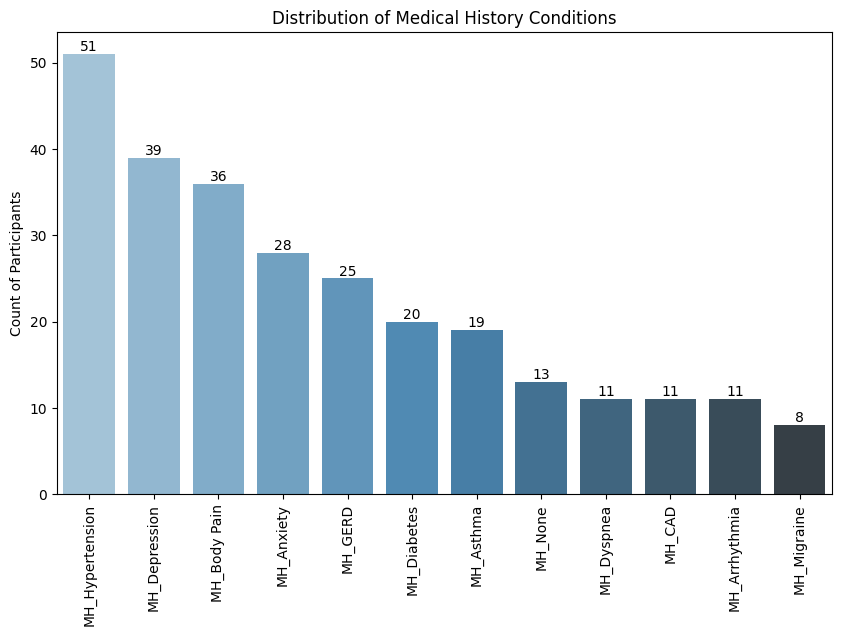

In [20]:
# Plot medical history counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mh_counts.index, y=mh_counts.values, palette='Blues_d')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Medical History Conditions')
plt.xticks(rotation=90)
plt.ylabel('Count of Participants')
plt.show()

From the chart above, Hypertension is the most prevalent condition in the medical history of participants, affecting 51% of the participants in the study. This might be important when analyzing the relationship between Sleep apnea and cardiovascular health. <br> <br>
Depression and Body Pain are the next most prevalent conditions, affecting 39% and 36% of the participants respectively. <br> <br>
This is closely followed by Anxeity, Gastroesophageal Reflux Disease (GERD), Diabetes and Asthma.


Now, let's look at the distribution of sleep disorders among participants in the dataset.

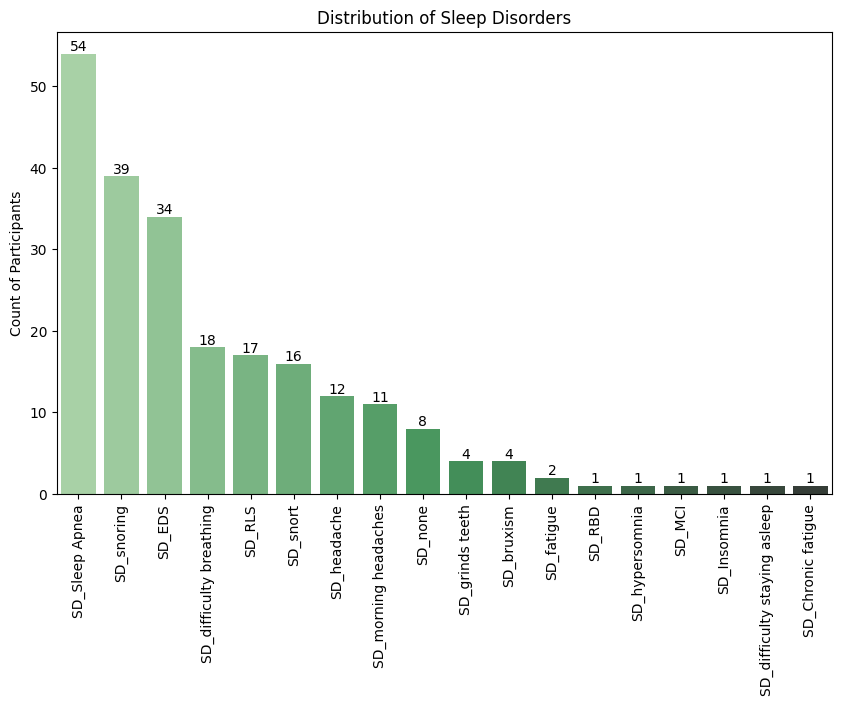

In [21]:
# Plot sleep disorders counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sd_counts.index, y=sd_counts.values, palette='Greens_d')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Sleep Disorders')
plt.xticks(rotation=90)
plt.ylabel('Count of Participants')
plt.show()

For sleep disorders, sleep apnea is the most prevalent sleep disorder in the dataset, currently affecting 54% of the participants. <br> <br>
Snoring and Excessive Daytime Sleepiness (EDS) closely follow, affecting 39% and 34% of participants respectively.<br> <br>
Other sleep disorders that moderately affect the participants are Difficulty Breathing, Restless Legs Syndrome (RLS) and Snorting and headaches. 


<br>

### 1b. Number of participants with sleep apnea by gender

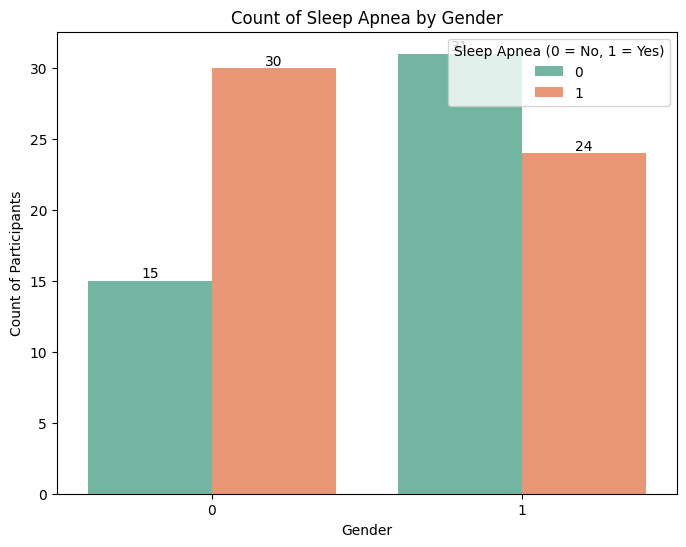

In [22]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_new, x='GENDER', hue='SD_Sleep Apnea', palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Set plot labels and title
plt.title('Count of Sleep Apnea by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Participants')
plt.legend(title='Sleep Apnea (0 = No, 1 = Yes)')
plt.show()

Here, we notice 30 males have sleep apnea while 24 females have sleap apnea.

<br>

### 1c. Percentage of participants with sleep apnea by gender

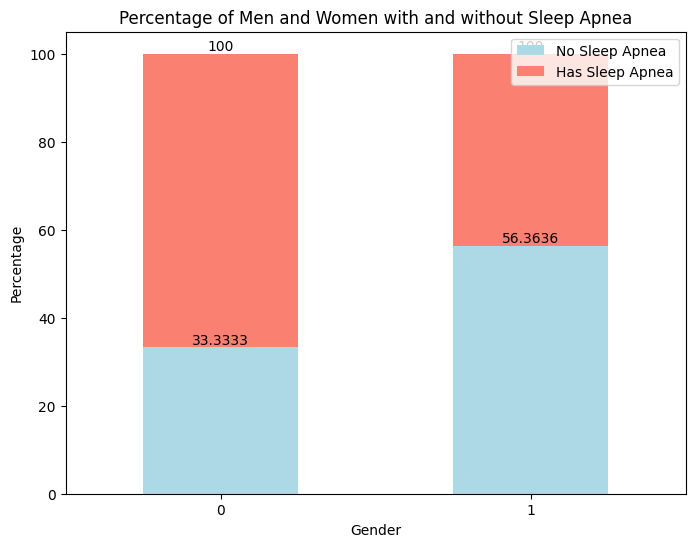

In [23]:
# Create a pivot table to calculate the percentage of participants with and without sleep apnea by gender
gender_sleep_apnea = df_new.groupby(['GENDER', 'SD_Sleep Apnea']).size().unstack()

# Normalize to get percentages
gender_sleep_apnea_percentage = gender_sleep_apnea.div(gender_sleep_apnea.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = gender_sleep_apnea_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Percentage of Men and Women with and without Sleep Apnea')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No Sleep Apnea', 'Has Sleep Apnea'], loc='upper right')
plt.show()

From the above chart, 67% of men in the study have sleep apnea while 44% of the women have sleep apnea.

<br>

### 1d. Distribution of AHI, BMI and Arousal Index against most prevalent sleep disorders

<br>
Let us examine the distributions of AHI, BMI and Arousal Index for the participants based on the presence(1) or absence(0) of the most prevalent sleep disorders earlier derived from the distribution of sleep disorders. Here, we are looking for insights regarding which disorders are more closely tied to these metrics. <br>
Each subplot below corresponds to a different sleep disorder, with AHI, BMi or Arousal Index on the y-axis.


#### AHI

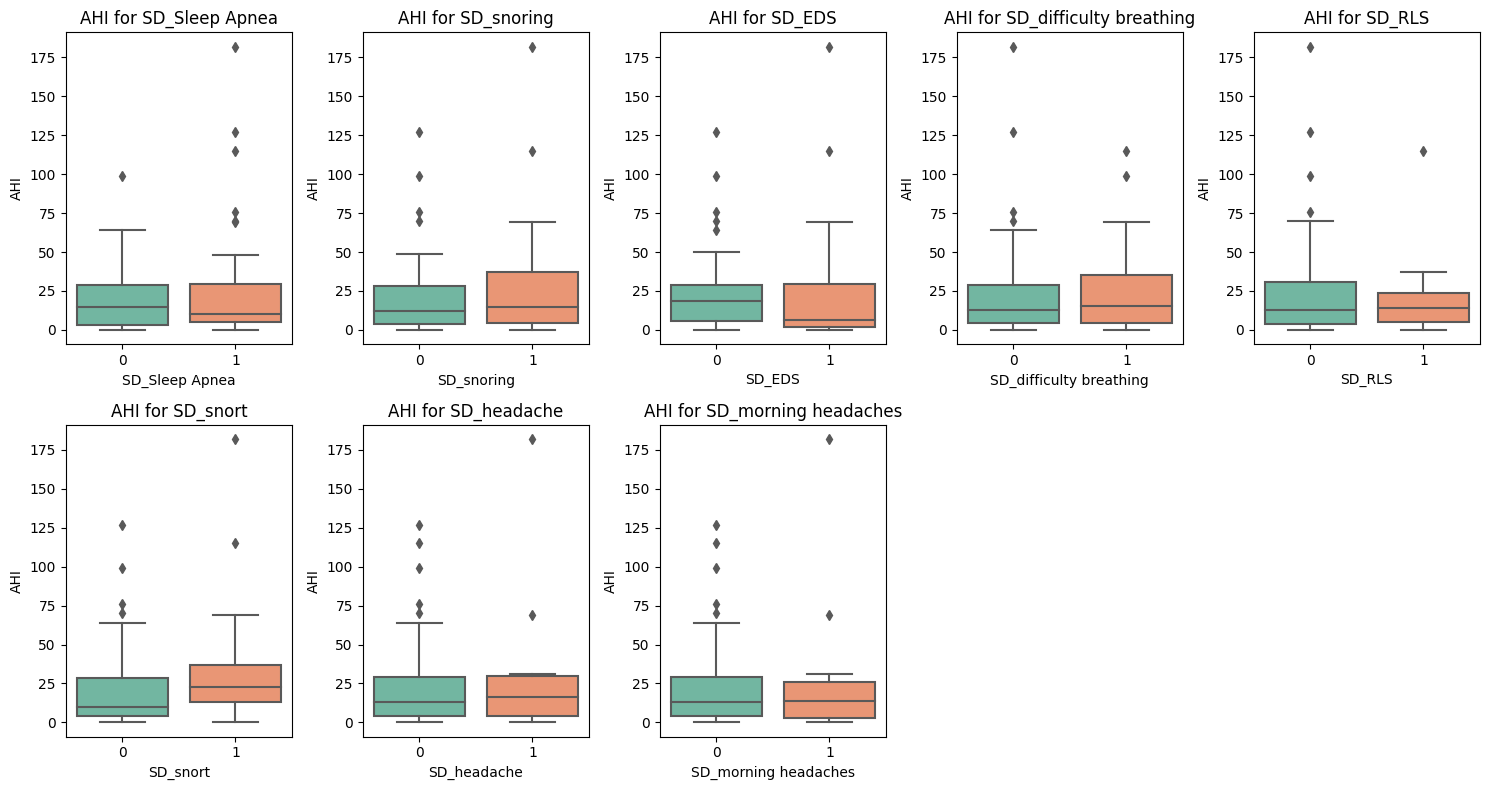

In [24]:
# List of sleep disorder columns
sd_columns = ['SD_Sleep Apnea', 'SD_snoring', 'SD_EDS', 'SD_difficulty breathing', 'SD_RLS', 'SD_snort', 'SD_headache', 'SD_morning headaches']

# Set up the figure with subplots for each sleep disorder
plt.figure(figsize=(15, 8))

# Create boxplots for each sleep disorder
for i, sd_col in enumerate(sd_columns, 1):
    plt.subplot(2, len(sd_columns) // 2 + 1, i)  # Adjust the layout (2 rows)
    sns.boxplot(data=df_new, x=sd_col, y='AHI', palette='Set2')
    plt.title(f'AHI for {sd_col}')
    plt.xlabel(sd_col)
    plt.ylabel('AHI')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

These boxplots reveal the following insights: <br> <br>
Participants with sleep apnea have higer AHI values compared to those without, which is expected since AHI is generally used to measure the severity of sleep apnea. However, in this population, the difference in AHI with none sleep apnea individuals is very minimal. This may imply that AHI values on their own may not be the best test for diagnosing sleep apnea. Other factors will need consideration. There are also outliers with high AHI in the none sleap apnea category which might suggest undiagnosed sleep apnea conditions. <br> <br>
Participants who snort and snore while sleeping exibit higher AHI than those who do not. This is expected since snoring is often associated with obstructive sleep apnea. <br> <br>
For those with sleep disorders like Excessive Daytime Sleepiness (EDS), difficulty breathing, Restless Legs Syndrome (RLS) and headaches, the difference in AHI values between participants with or without these conditions is very small. This suggests that these conditions may not be strongly correlated with the severity of apnea-hypopnea events (AHI).


#### BMI

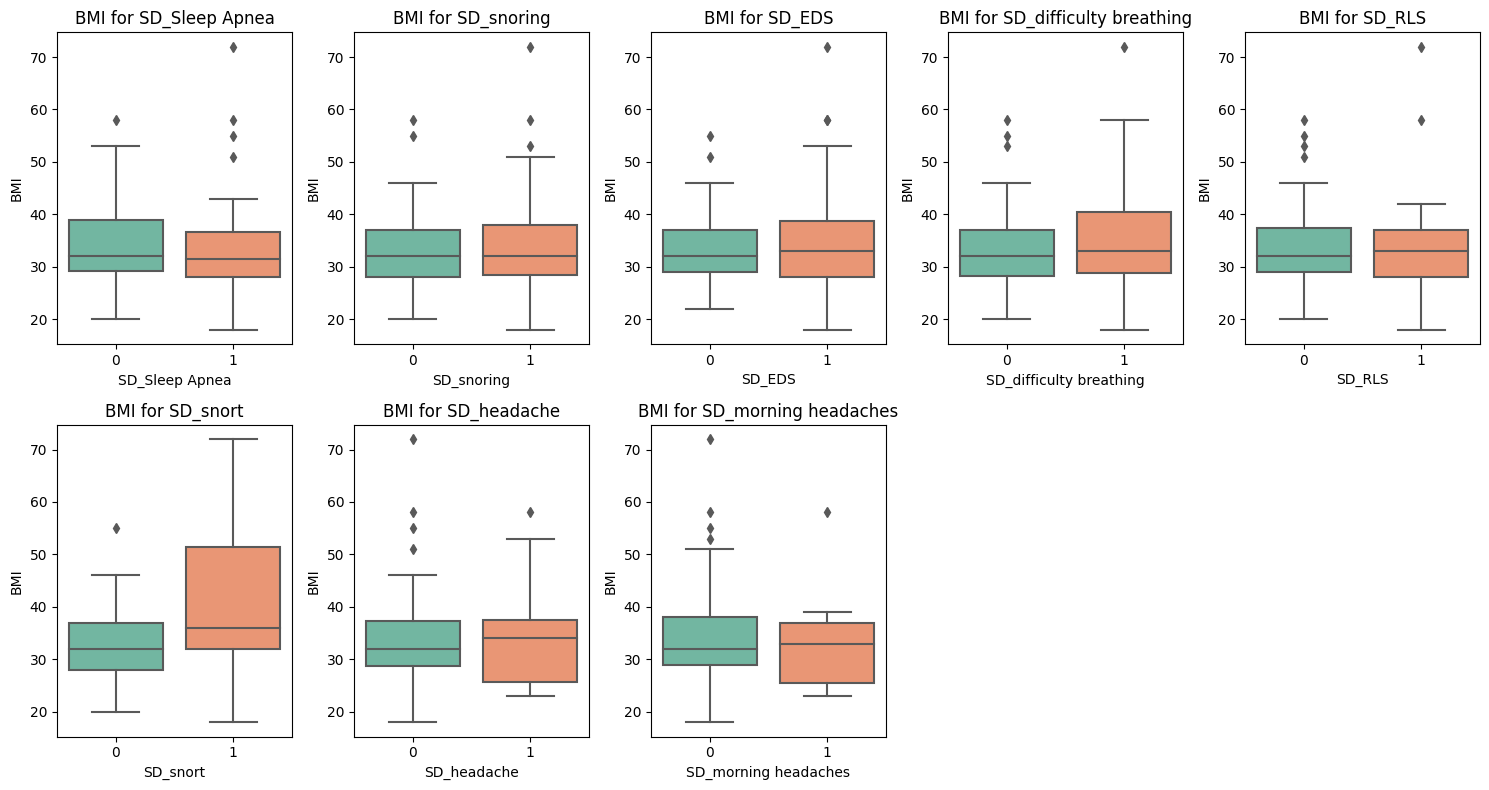

In [25]:
# List of sleep disorder columns
sd_columns = ['SD_Sleep Apnea', 'SD_snoring', 'SD_EDS', 'SD_difficulty breathing', 'SD_RLS', 'SD_snort', 'SD_headache', 'SD_morning headaches']

# Set up the figure with subplots for each sleep disorder
plt.figure(figsize=(15, 8))

# Create boxplots for each sleep disorder
for i, sd_col in enumerate(sd_columns, 1):
    plt.subplot(2, len(sd_columns) // 2 + 1, i)  
    sns.boxplot(data=df_new, x=sd_col, y='BMI', palette='Set2')
    plt.title(f'BMI for {sd_col}')
    plt.xlabel(sd_col)
    plt.ylabel('BMI')

plt.tight_layout()  
plt.show()

In this dataset, sleep apnea, snoring, snorting, EDS and difficulty breathing tend to be associated with slightly higher BMI, which aligns with the relationship between obesity and sleep-related breathing disorders. <br> <br>
There is no clear difference in BMI for participants reporting headaches or morning headaches, indicating that headaches might not be closely linked to BMI.<br> <br>
The existence of outliers in most of the plots indicates that some individuals do not follow the general trend, and this may be due to other contributing factors.

#### Arousal Index

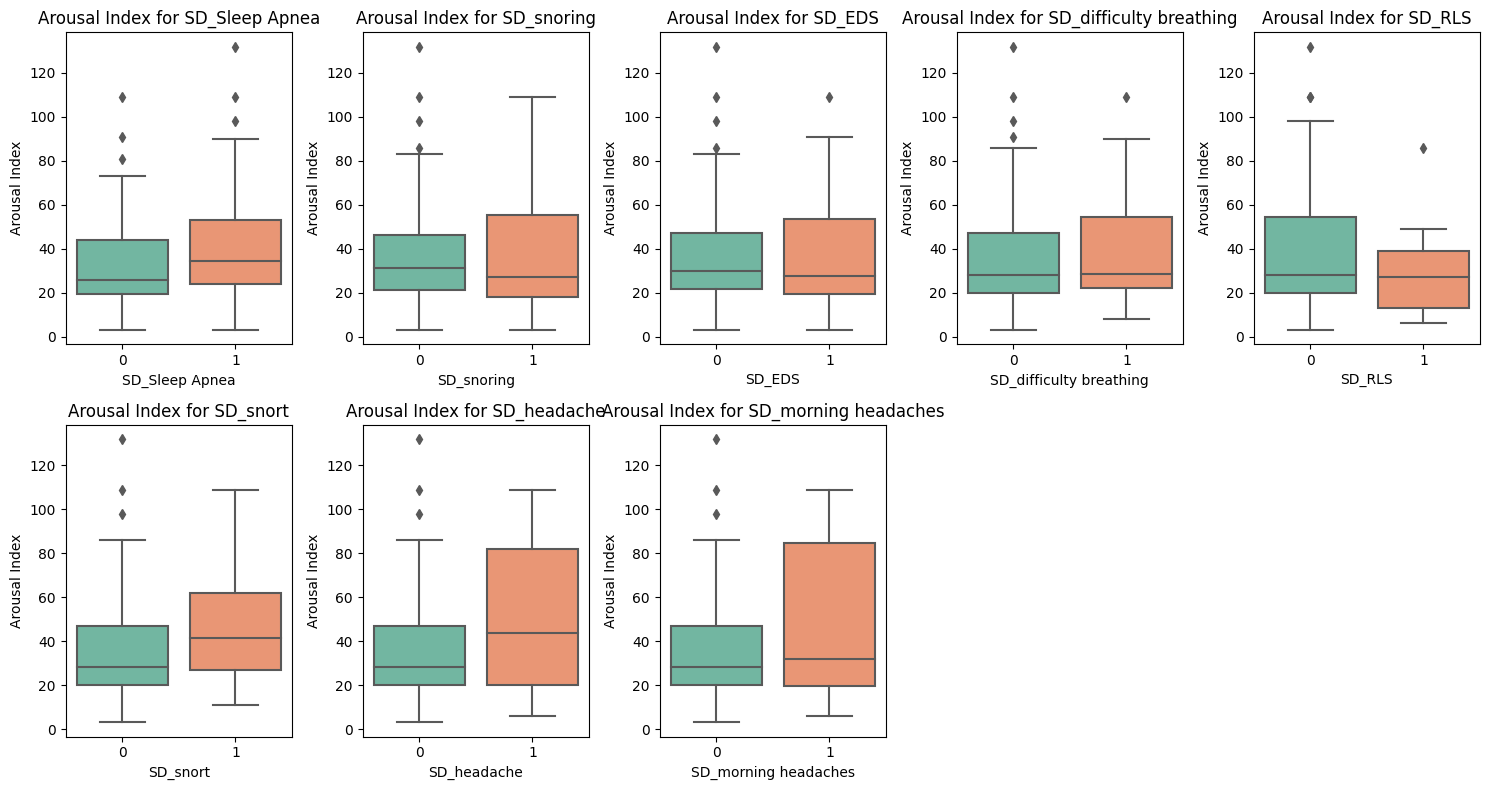

In [26]:
# List of sleep disorder columns
sd_columns = ['SD_Sleep Apnea', 'SD_snoring', 'SD_EDS', 'SD_difficulty breathing', 'SD_RLS', 'SD_snort', 'SD_headache', 'SD_morning headaches']

# Set up the figure with subplots for each sleep disorder
plt.figure(figsize=(15, 8))

# Create boxplots for each sleep disorder
for i, sd_col in enumerate(sd_columns, 1):
    plt.subplot(2, len(sd_columns) // 2 + 1, i)  
    sns.boxplot(data=df_new, x=sd_col, y='Arousal Index', palette='Set2')
    plt.title(f'Arousal Index for {sd_col}')
    plt.xlabel(sd_col)
    plt.ylabel('Arousal Index')

plt.tight_layout()  
plt.show()

Sleep apnea, snoring, difficulty breathing, and snorting are strongly linked to higher Arousal Index values, indicating that these conditions may lead to frequent sleep disturbances. <br> <br>
Those with headaches or morning headaches also show higher Arousal Index values, suggesting that the interrupted sleep may be linked to the headaches.

<br> <br>
## 2. What relationships exist among the variables other than medical history and sleep disorders?

We can now examine correlations in the dataset to help identify relationships between the variables

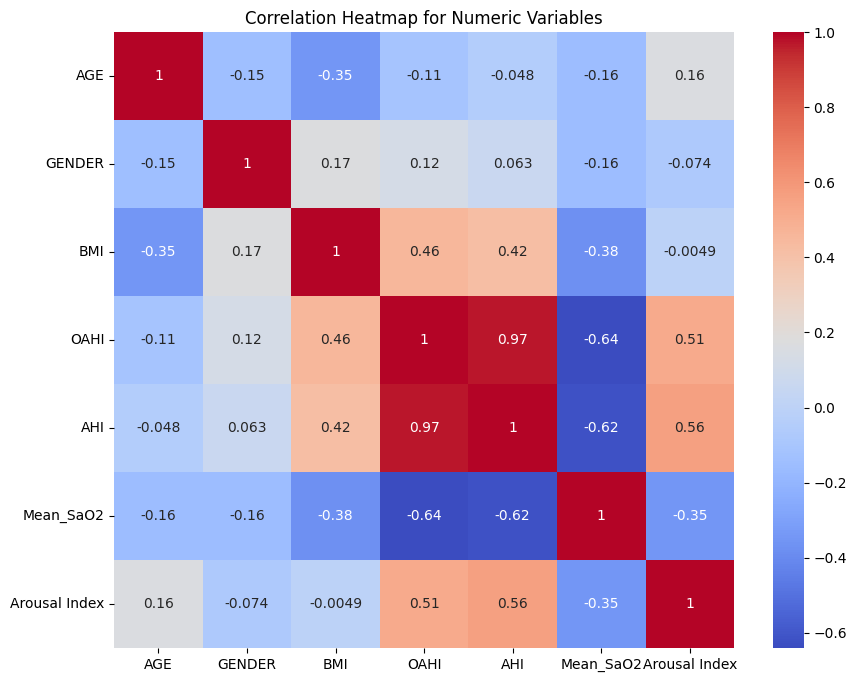

In [27]:
# Correlation heatmap for numeric variables (AGE, BMI, OAHI, AHI, Mean_SaO2, Arousal Index)

plt.figure(figsize=(10, 8))
sns.heatmap(df_new[['AGE', 'GENDER', 'BMI', 'OAHI', 'AHI', 'Mean_SaO2', 'Arousal Index']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

There is obviously a strong positive correlation between Obstructive apnea-hypopnea index (OAHI) and Apnea-hypopnea index (AHI), which means only one of the two will be useful in analysing the severity of sleep apnea.<br> <br>
Both OAHI and AHI show moderate positive correlations with Arousal Index (0.56 and 0.51 respectively), which means the higher the OAHI or AHI, the higher the Arousal Index. <br> <br>
Body Mass Index (BMI) shows a moderate positive relationship with OAHI and AHI, which suggests that participants with higher BMI are more likely to have more severe apnea events. <br> <br>
Mean Oxygen Saturation (Mean_SaO2) shows strong negative relationships with all of AHI, OAHI and Arousal Index. This is expected since all 3 of them are indicators of sleep apnea, a condition charaterized by low oxygen levels in the blood.<br> <br>
Age shows very weak relationships with other variables, except for BMI where it suggests a slight inverse relationship. So, younger individuals tend to have a higher BMI than older individuals.<br> <br>
Overall, the heatmap indicates that OAHI, AHI, and the Arousal Index are strongly related to sleep apnea severity, while BMI also plays a role, particularly in its relationship with OAHI and AHI. Age and gender appear to have less influence on the apnea-related metrics.


<br> <br>
## 3. What relationships exist among the medical history and sleep disorder variables?

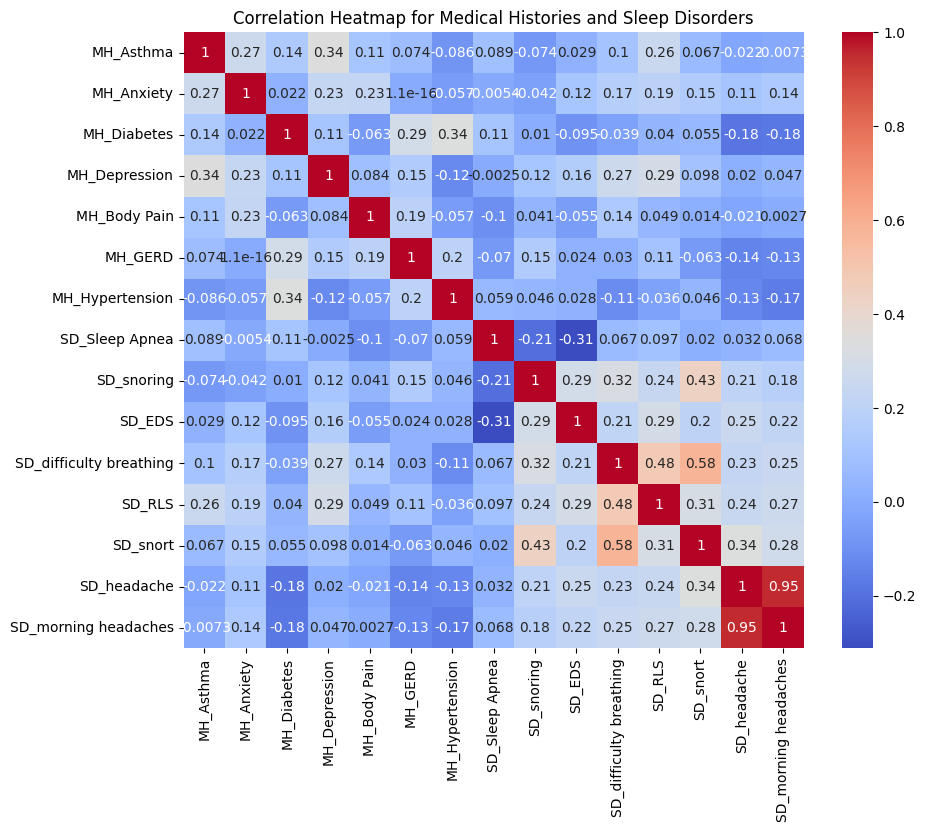

In [28]:
# Correlation heatmap for the most prevalent medical history and sleep disorder variables derived from above bar plots

plt.figure(figsize=(10, 8))
sns.heatmap(df_new[['MH_Asthma', 'MH_Anxiety', 'MH_Diabetes', 'MH_Depression', 'MH_Body Pain', 'MH_GERD', 'MH_Hypertension', 
                    'SD_Sleep Apnea', 'SD_snoring', 'SD_EDS', 'SD_difficulty breathing', 'SD_RLS', 'SD_snort', 'SD_headache', 
                    'SD_morning headaches']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Medical Histories and Sleep Disorders')
plt.show()

There's an obvious overlap between headaches and morning headaches, indicating that participants complaining of headaches also complain of morning headaches. So, only one of these should be included in any further analysis or prediction. <br> <br>
There's a relatively strong positive correlation (0.58) between snorting and snoring, suggesting that those who snore are more likely to snore during their sleep. <br> <br>
I noticed something abnormal here: Sleep Apnea shows little or no correlation with any of these variables. Although one will reasonably expect snorting and snoring to be positively correlated to Sleep Apnea, the current dataset does not demonstrate that. Snoring and snorting are often signs of obstructive sleep apnea according to SummaHealth (https://www.summahealth.org/flourish/entries/2020/11/signs-of-sleep-apnea-when-is-snoring-something-more-serious). This suggests a limitation on the participants' data collected as it may be incomplete. <br> <br>
Difficulty breathing has a strong positive correlation (0.58) with snorting, and a weak to moderate correlation (0.34) with snoring, implying that according to this dataset, if you experience difficulty breathing, you are more likely to snort, and to a lesser extent, snore during your sleep.<br> <br>
Restless Leg Syndrome (RLS) has a moderate positive relationship (0.48) with difficulty breathingwhich may imply a connection between the two sleep disorders.<br> <br>
Diabetes shows moderate positive correlations(0.34 and 0.29) with hypertension and Gastroesophageal reflux disease (GERD), meaning participants with hypertension are likely to experience diabetes and GERD.
Depression has moderate positive correlations with several medical conditions including asthma, anxiety, difficulty breathing and RLS(<br> <br>
Sleep Apnea shows little or no correlation with any of these variables<br> <br>
All these are potential areas of focus for further analysis, especially if you want to get more on the relationships between sleep disorders, cardivascular conditions and mental health.<br> <br>
<br> <br>



## Limitations of this analysis

Before relying on conclusions about a broader population, we should consider that the current dataset and thus, the analysis may be limited in the following respects: <br>
- The number of participants in the DREAMT dataset is only 100, meaning it is not large enough to capture variability of sleep disorders across different populations.
- Inaccurate data being reported by participants. Some of the data may have been reported by the participants and may be subjective in nature. For example, snoring would be difficult to measure.
- The dataset does not disclose medications or other treatments that the participants may be undergoing for underlying sleep disorders. The lack of this information might distort the potential drivers behind their sleep patterns.
<br> <br>

# Conclusion

In summary the various bar plots, box plots and heatmaps reveal the following. <br> <br>
Overall, OAHI, AHI, and the Arousal Index are strongly related to sleep apnea severity, while BMI also plays a role, particularly in its relationship with OAHI and AHI. Age appears to have less influence on the apnea-related metrics.<br> <br>
Sleep apnea and snoring are linked with higher AHI values, which is expected given their association with breathing interruptions during sleep.<br> <br>
Sleep Apnea, Snoring, and Difficulty Breathing during sleep tend to be associated with slightly higher BMI, which is consistent with the well-established relationship between obesity and sleep-related breathing disorders.<br> <br>
Specific sleep disorders, particularly those related to breathing difficulties, contribute to increased sleep arousals and poorer sleep quality.<br> <br>
Medical histories such as depression, anxiety, and hypertension are moderately correlated with various sleep and medical conditions, reflecting known comorbidities in health data.


In [29]:
df_new.to_csv('file.csv')